<a href="https://colab.research.google.com/github/rmahesh6386/DataScience_Python/blob/main/Assignment_04_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment_04_Q1

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [45]:
df=pd.read_csv('delivery_time.csv')
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


EDA and Data Visualization

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


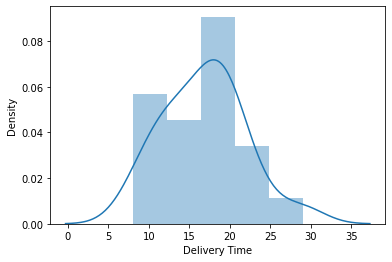

In [47]:
sns.distplot(df['Delivery Time'])

from the graph we can see that delivery time is slightly positively skewed data and mean between 15 and 18.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


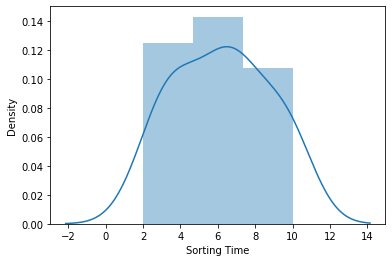

In [48]:
sns.distplot(df['Sorting Time'])

from the graph we can see that sorting time is uniformly distributed data and mean likelt to be at 7.

In [49]:
# Renaming Columns
df=df.rename({'Delivery Time':'Delivery_Time', 'Sorting Time':'Sorting_Time'},axis=1)
df.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [50]:
df.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


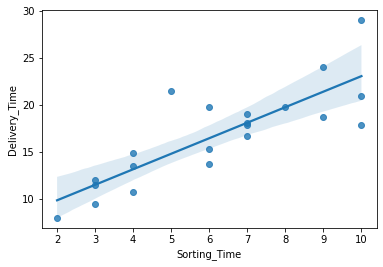

In [51]:
sns.regplot(x=df['Sorting_Time'],y=df['Delivery_Time'])

the correlation analysis tells that Delivery Time and Sorting Time are strongly positively related which is clearly evident fron the regression plot graph
 

In [52]:
model=smf.ols("Delivery_Time~Sorting_Time",data=df).fit()

In [53]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 31 Jan 2022   Prob (F-statistic):           3.98e-06
Time:                        08:27:26   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
 # prediction of delivery time for say sorting time 15
 del_time = (6.5827) + (1.6490)*(10)
 del_time

23.0727

In [61]:
# Prediction model for say sorting time 10, 15
new_data=pd.Series([10,15])
new_data

0    10
1    15
dtype: int64

In [62]:
new_data=pd.DataFrame(new_data,columns=['Sorting_Time'])
new_data

,Sorting_Time
0,10
1,15


In [63]:
model.predict(new_data)

0    23.072933
1    31.318032
dtype: float64